In [1]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing, linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train=pd.read_csv('/Users/jimmyfu87/JupyterNotebook/Dataset/titanic/titanic_train.csv')
test=pd.read_csv('/Users/jimmyfu87/JupyterNotebook/Dataset/titanic/titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data=train.append(test)
data

/Users/jimmyfu87/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [7]:
#取消重複index，重新排列index
data.reset_index(inplace=True, drop=True)

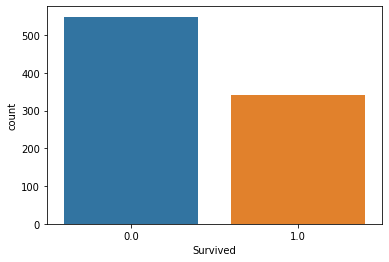

In [8]:
#x軸為survive or not
sns.countplot(data['Survived'])

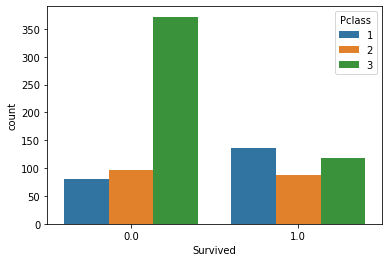

In [9]:
#hue可根據Pclass有不同顏色
sns.countplot(data['Survived'],hue=data['Pclass'])

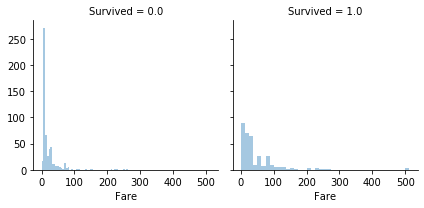

In [10]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Fare',kde=False)

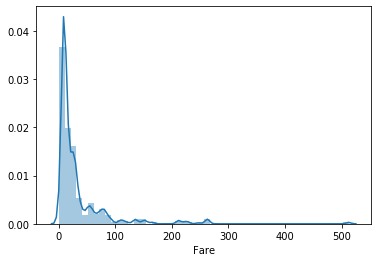

In [11]:
#取Fare的平均值
fare_mean=np.mean(data['Fare'])
#用平均值填補NaN
data['Fare']=data['Fare'].fillna(fare_mean)
#將Fare的Float轉乘int
data['Fare'].astype('int')
sns.distplot(data['Fare'])

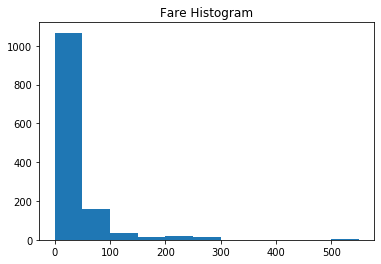

In [12]:
plt.hist(data['Fare'],bins=[0,50,100,150,200,250,300,350,400,500,550])
plt.title("Fare Histogram")
plt.show()

In [13]:
# 將 Age 遺漏值以 median 填補
age_median = np.nanmedian(train["Age"])
new_Age = np.where(train["Age"].isnull(), age_median, train["Age"])
train["Age"] = new_Age
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
# 創造 dummy variables(只會產生一個變數)
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(train["Sex"])
encoded_Sex

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [15]:
# 創造 one-hot(產生多個變數)
train = pd.get_dummies(data=train,columns=['Embarked'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1,0,0


In [16]:
for i in range(len(train)):
    if(train["Embarked_C"][i]==0 and train["Embarked_Q"][i]==0 and train["Embarked_S"][i]==0):
        print("It has null")

It has null
It has null


In [17]:
train_X = pd.DataFrame([train["Pclass"],
                        encoded_Sex,
                        train["Age"],
                        train["Embarked_C"],
                        train["Embarked_Q"],
                        train["Embarked_S"]
                       ]).T
train_X

,Pclass,Unnamed 0,Age,Embarked_C,Embarked_Q,Embarked_S
0,3.0,1.0,22.0,0.0,0.0,1.0
1,1.0,0.0,38.0,1.0,0.0,0.0
2,3.0,0.0,26.0,0.0,0.0,1.0
3,1.0,0.0,35.0,0.0,0.0,1.0
4,3.0,1.0,35.0,0.0,0.0,1.0
5,3.0,1.0,28.0,0.0,1.0,0.0
6,1.0,1.0,54.0,0.0,0.0,1.0
7,3.0,1.0,2.0,0.0,0.0,1.0
8,3.0,0.0,27.0,0.0,0.0,1.0
9,2.0,0.0,14.0,1.0,0.0,0.0


# Logistic和XGB

In [16]:
# 建立模型
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, train["Survived"])

print(logistic_regr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


/Users/jimmyfu87/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
#XGBoost實作
from sklearn.model_selection import train_test_split
X = train[['Pclass', 'Age', 'Sex','Parch','Embarked_C','Embarked_Q','Embarked_S']]
y = train['Survived']
X['Age'] = X['Age'].fillna(X['Age'].mean())

X['Sex'] = X['Sex'].map({'male':0,'female':1})
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=33)

/Users/jimmyfu87/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/jimmyfu87/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [44]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=3, n_estimators=3000, learning_rate=0.0015)
xgbc.fit(X_train, y_train)
print('The accuracy of eXtreme Gradient Boosting Classifier on testing set:', xgbc.score(X_val, y_val))

The accuracy of eXtreme Gradient Boosting Classifier on testing set: 0.852017937219731


# Deep Learining實作

In [18]:
train_deep=pd.DataFrame([train["Survived"],
                        train["Pclass"],
                        encoded_Sex,
                        train["Age"],
                        train["Embarked_C"],
                        train["Embarked_Q"],
                        train["Embarked_S"]
                       ]).T

In [19]:
ndarray=train_deep.values
ndarray.shape

(891, 7)

In [20]:
#將Survived的欄位assign給Label，將其他欄位assign給Features
Label=ndarray[:,0]
Features=ndarray[:,1:]

In [21]:
#Minmax標準化特徵值
from sklearn import preprocessing
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
scaledFeatures=minmax_scale.fit_transform(Features)

In [22]:
#切分訓練集和測試集
from sklearn.model_selection import train_test_split
F_train, F_val, L_train, L_val = train_test_split(Features, Label, test_size=0.2, random_state=10)

In [23]:
print("Total:",F_train.shape[0]+F_val.shape[0],
     "Train:",F_train.shape[0],
     "Val:",F_val.shape[0])

Total: 891 Train: 712 Val: 179


In [24]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense,Dropout
model=Sequential()
model.add(Dense(units=100,input_dim=F_train.shape[1],kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=50,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=20,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='relu'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 6,791
Trainable params: 6,791
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy
model.compile(Adam(lr=.0002), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
train_history=model.fit(x=Features,y=Label,validation_split=0.2,epochs=10,batch_size=5,verbose=1)

Train on 712 samples, validate on 179 samples
Epoch 1/10
712/712 [==============================] - 0s 665us/step - loss: 1.4789 - accuracy: 0.6096 - val_loss: 0.9065 - val_accuracy: 0.6425
Epoch 2/10
712/712 [==============================] - 0s 443us/step - loss: 0.8061 - accuracy: 0.5927 - val_loss: 0.7417 - val_accuracy: 0.6480
Epoch 3/10
712/712 [==============================] - 0s 423us/step - loss: 0.7559 - accuracy: 0.5787 - val_loss: 0.7294 - val_accuracy: 0.6480
Epoch 4/10
712/712 [==============================] - 0s 386us/step - loss: 0.7429 - accuracy: 0.5829 - val_loss: 0.7204 - val_accuracy: 0.6425
Epoch 5/10
712/712 [==============================] - 0s 418us/step - loss: 0.7356 - accuracy: 0.5660 - val_loss: 0.7085 - val_accuracy: 0.6480
Epoch 6/10
712/712 [==============================] - 0s 427us/step - loss: 0.7244 - accuracy: 0.5815 - val_loss: 0.6987 - val_accuracy: 0.6536
Epoch 7/10
712/712 [==============================] - 0s 372us/step - loss: 0.7149 - accur

In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

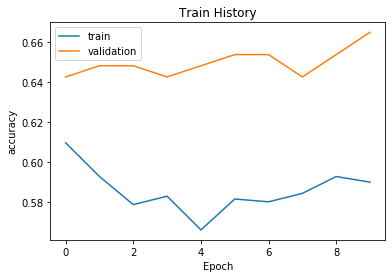

In [28]:
show_train_history(train_history,'accuracy','val_accuracy')

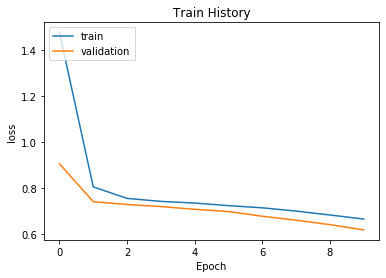

In [29]:
show_train_history(train_history,'loss','val_loss')